<a href="https://colab.research.google.com/github/lstarke/fraude_cartao_credito/blob/main/LeandroStarke_Detectando_Fraudes_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Detecção de Fraudes em Cartões de Crédito</h1> 

<center><img width="50%" src="https://drive.google.com/uc?export=view&id=1_BAuERc_X_vX7S42rxJK6FovpgOvWBgd"></center>

<p align="center">por Leandro Starke</p> 

<div class="markdown-google-sans">

# <strong> Business Understanding
</div>



<div class="markdown-google-sans">

## Sobre fraudes em cartões de crédito
</div>


O constante crescimento de transações online, causado principalmente pela
popularidade de e-commerces na última década, fez com que os casos de fraudes com cartões de crédito se tornassem cada vez mais comuns (AZEVEDO, 2021).

A fraude está relacionada ao uso ilegal das informações de crédito de um titular, na realização de compras sem o seu consentimento. As transações com cartão de pagamento podem ser  realizadas  fisicamente  ou  digitalmente (MARTINS et al., 2022).

Os fraudadores são favorecidos pelo uso da internet, pois sua identidade e localização ficam ocultas. O aumento com a fraude na utilização de cartão de pagamento tem um grande impacto no setor financeiro. A fraude global de cartão de crédito em 2015 atingiu um nível impressionante de US $ 21,84 bilhões (PYMNTS, 2016)

O Brasil está em segundo lugar no ranking de países com mais fraudes em cartões de crédito, débito e pré-pagos de acordo com uma pesquisa divulgada por Knieff (2016). Os dados mostram que 49% dos entrevistados brasileiros sofreram algum tipo de fraude de cartão nos últimos 5 anos da publicação da pesquisa. O estudo também mostra que o Brasil é um ambiente favorável para ataques deste tipo, pois muitas empresas de comércio eletrônico não têm fortes controles para a prevenção de fraudes(AZEVEDO, 2021).

<div class="markdown-google-sans">

## Problema a ser resolvido
</div>



De acordo com Shakya (2018), o processo de detecção de fraude consiste em
rotular se uma transação é legítima ou não. Sistemas automatizados para detecção de fraudes são necessários considerando o enorme volume de transações, não sendo possível para humanos verificar manualmente se cada transação é fraudulenta ou não, considerando que no ano de 2021, foram feitas mais de 12,6 bilhões de transações com cartão de crédito no Brasil (Banco Central do Brasil, 2022).

Uma dificuldade geralmente encontrada é que os conjuntos de dados em geral têm muito mais dados de clientes que foram aprovados (ou têm um bom histórico financeiro) que o contrário (MARTINS et al., 2022).

Sendo assim, temos um desbalanceamento de classes: a quantidade de transações legítimas é proporcionalmente mais representada quando comparada ao número de transações fraudulentas (CHAN et al., 1999). Quando os dados de treinamento de um sistema são desbalanceados desta forma, um algoritmo de aprendizado pode descartar a classe minoritária, tratando-os como ruído e classificando todos os registros como instâncias da classe majoritária (FIORE et al., 2017) ou seja, isso é equivalente a não detectar fraude alguma (CHAN et al., 1999).











<div class="markdown-google-sans">

# <strong> Data Understanding
</div>





<div class="markdown-google-sans">

## Fonte dos dados
</div>


Os dados utilizados neste trabalho foram retirados do site [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). De acordo com o Kaggle, o dataset contem transações feitas em cartões de crédito durante um periodo de dois dias em Setembro de 2013 por titulares de cartões de crédito.

Além disso, também é informado pelo Kaggle que o dataset contem somente variáveis numéricas que são resultado de uma Analise de Componentes Principais (PCA). As variáveis V1, V2, ... V28 são os componentes principais obtidos pelo método de PCA. As variáveis ```Time``` e ```Amount``` não passaram pela transformação do método PCA.

A variável ```Time``` informa o tempo em segundos decorrido entre cada transação e a primeira (linha) transação no dataset.

A variável ```Amount``` é a quantia da transação.

A variável ```Class``` é a nossa variável alvo (target). Esta variável é binária e contem 0 indicando que a transação é legítima e 1 indicando uma transação fraudulenta.


Por fim, para manter a confidencialidade dos titulares dos cartões de crédito, os dados do dataset foram anonimizados



## Importando dados como DataFrame

In [ ]:
import pandas as pd 

# transforando os dados em um Pandas DataFrame
df = pd.read_csv("/content/creditcard.csv", sep=",")

# dimensões do DataFrame
print(f'Quantidade de linhas/colunas do DataFrame: {df.shape}')

Quantidade de linhas/colunas do DataFrame: (284807, 31)


<div class="markdown-google-sans">

## Visualizando o início do DataFrame
</div>

In [ ]:
# imprimindo as 5 primeiras linhas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<div class="markdown-google-sans">

## Visualizando o final do DataFrame
</div>


In [ ]:
# imprimindo as últimas 5 linhas
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


<div class="markdown-google-sans">

## Informações do DataFrame
</div>


Este método retorna um overview geral sobre o nosso DataFrame, podemos ver facilmente todas as variáveis presentes, se temos algum dado nulo e qual o tipo da variável.

Dessa forma podemos ver que nosso DataFrame tem um total de 30 variáveis, nenhum dado nulo pois todas as variáveis possuem uma quantidade igual de registros e todas as variáveis exceto ```Class``` são do tipo ```float64```. 

In [ ]:
# informações gerais do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div class="markdown-google-sans">

## Verificando dados NaN no DataFrame
</div>



Mais uma forma de verificar dados nulos no DataFrame. Neste caso estamos utilizado o métodos ```isna()``` fornecido pelo Pandas e somando todos estes valores.

Como podemos ver, o retorno desta função é zero para todas as variáveis.

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<div class="markdown-google-sans">

## Dados estatísticos sobre a variável ```Amount```
</div>

Com o método ```describe()``` podemos verificar um sumário com estatísticas descritivas dos nossos dados.

Neste caso estamos verificando estas estatísticas em todos os nosso dados, ou seja, em transações legítimas e fraudulentas. 

Vamos dividir nosso DataFrame em dois, um com somente transações legítimas e outro com somnte trasações fraudulentas e vamos ver se teremos alguma variação nestes dados.

In [ ]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# separandos o DataFrame principal em dois novos DataFrames, um contendo somente
# as trasações legítimas e outro contando apenas as transações fraudulentas
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

Verificando o shape dos nossos DataFrames conseguimos identificar o nosso primeiro problema. Temos um DataFrame com classes desbalanceadas. Das 284315 transações presentes no DataFrame, apenas 492 são fraudulentas.

In [ ]:
print(f"Shape das transações legítimas: {legit.shape}\n" +
      f"Shape das transações fraudulentas: {fraud.shape}")

Shape das transações legítimas: (284315, 31)
Shape das transações fraudulentas: (492, 31)


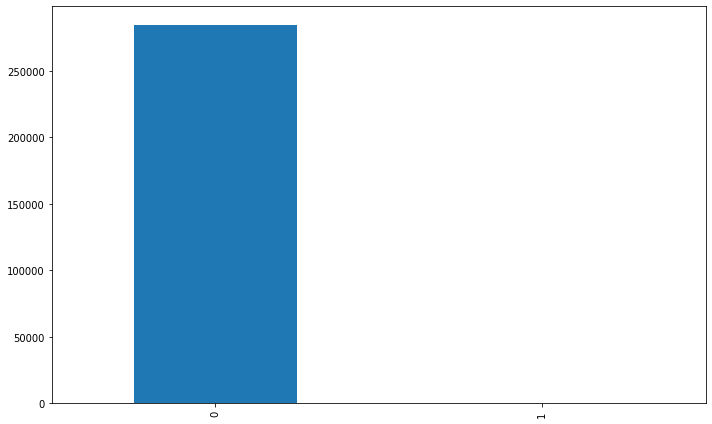

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

df.Class.value_counts().plot(kind="bar", ax=ax)

plt.tight_layout()

In [ ]:
# porcentagem das classes no DataFrame
df.Class.value_counts() / df.shape[0]

0    0.998273
1    0.001727
Name: Class, dtype: float64

Estatísticas descritivas para o DataFrame com somente trasações legítimas.

In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Estatísticas descritivas para o DataFrame com somente trasações fraudulentas.

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Comparando as estatísticas descritivas podemos ver que a médias dos valores gastos em transações fraudulentas é maior do que em transações legítimas, ou seja, podemos criar a hipótese de que valores mais elevados estão sujeitos a ter uma maior probabilidade de ser fraude.

<div class="markdown-google-sans">

## Avaliando a correlação das variáveis com o alvo ```Amount``` utilizando o gráfico de densidade
</div>


Neste gráfico a linha na cor azul representa a classe 0 (transação legítima) e a linha na cor laranja representa a classe 1 (transação fraudulenta).

Além disso, vale ressaltar que a interpretação deste tipo de gráfico se dá da seguinte maneira. Quando as curvas estão bem separadas e não sobrepostas, então há uma correlação com o alvo. Se as curvas estão se sobrepondo muito, significa que a variável não está muito correlacionada com o alvo, por que o alvo é igualmente comum com os valores da variável em questão.



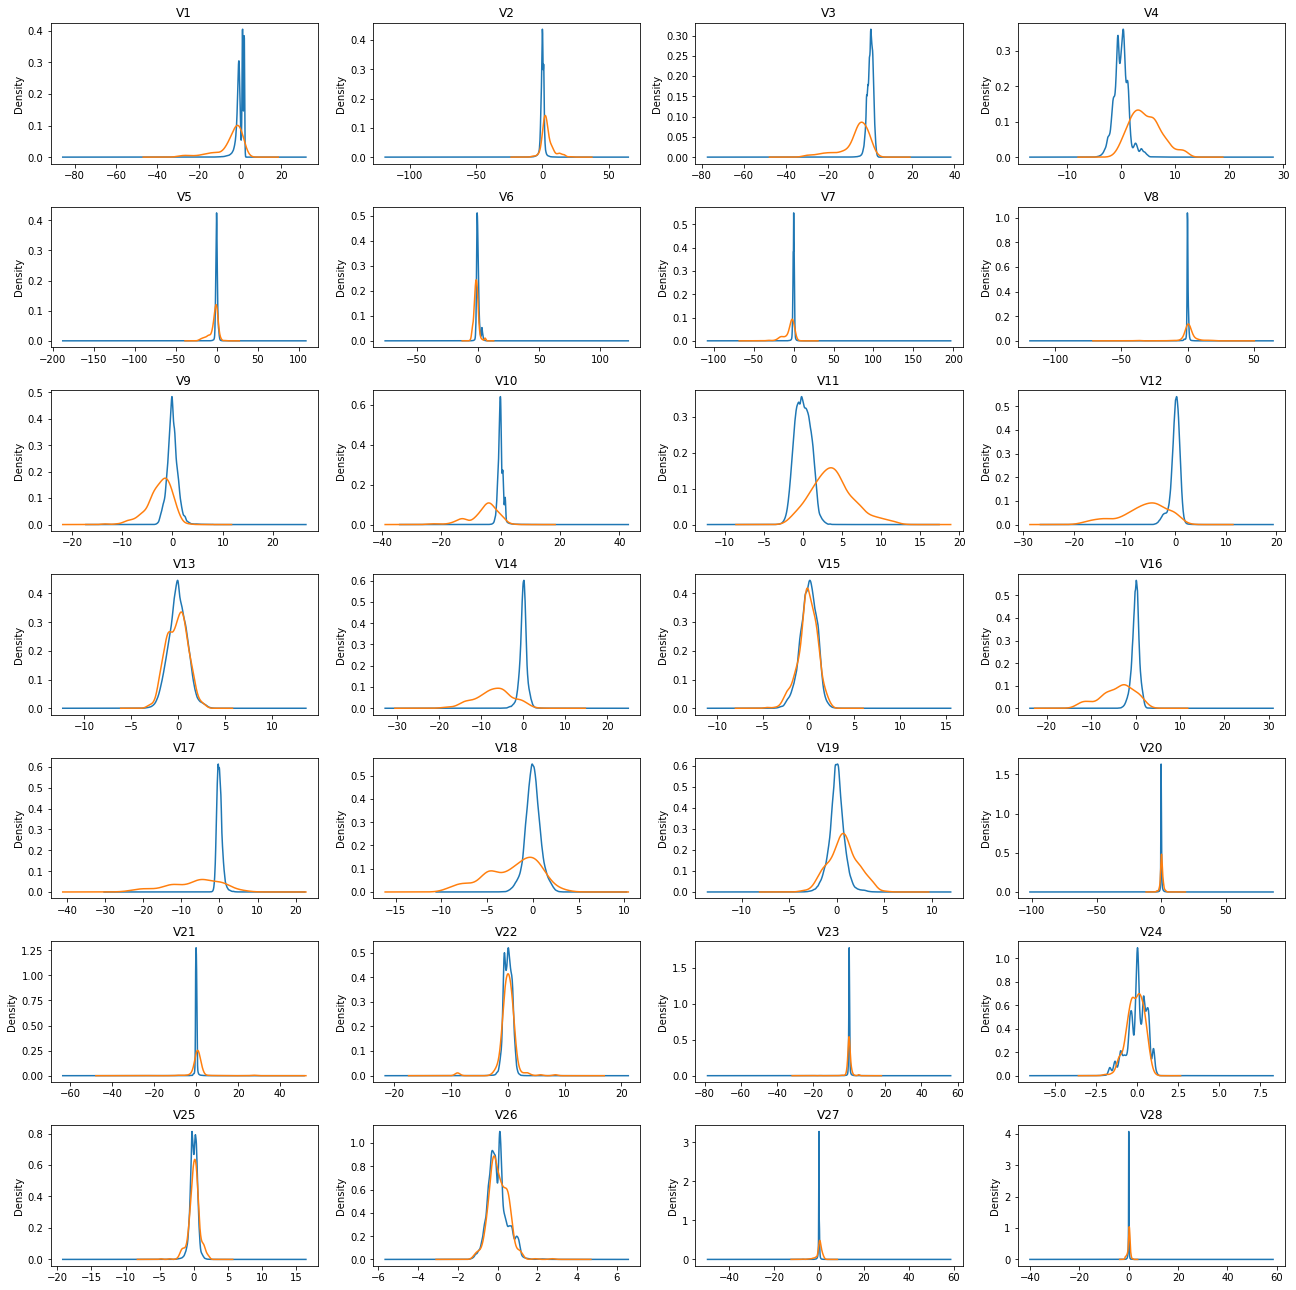

In [ ]:
import matplotlib.pyplot as plt

# considerando somente as variáveis V1, V2, ... V28
features = df.drop(["Time", "Amount", "Class"], axis=1).columns

# criando um grid de 28 posições 
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(18,18))

# plotando os gráficos em cada célula do grid
for ax, feature in zip(axs.flat, features):
  df[df.Class == 0][feature].plot.kde(ax=ax, title=feature);
  df[df.Class == 1][feature].plot.kde(ax=ax, title=feature);

fig.tight_layout(pad=1.0)

plt.savefig("densidade.jpeg", dpi=500, bbox_inches='tight')

Podemos concluir com os gráficos acima que as variáveis V3, V4, V10, V11, V12, V14 e V17 podem ter uma alta correlação com a nossa variável alvo (```class```)

<div class="markdown-google-sans">

# <strong>Data Preparation</strong>
</div>


Nesta etapa os dados serão manipulados e convertidos em formatos para que rendam melhores resultados. Valores numéricos devem, muitas vezes, ser normalizados ou dimensionados de modo que sejam comparáveis.

Etapas que serão seguidas:

1. Dividir dados de treino e dados de teste (utilizar parâmetro ```stratify=y```)
1. Normalização das features
1. Fazer o balanceamento somente nos dados de treino
1. Treinar o modelo utilizando os dados balanceados



<div class="markdown-google-sans">

## Separando dados em treino e teste
</div>


Aqui entramos em um conceito fundamental em Data Science, que são os dados de retenção (*holdout data*).

Avaliar o nosso modelo utilizando os dados de treinamento, exatamente os mesmos que foram utilizados para para construí-lo, não nos fornece uma noção do quão bem o modelo generaliza para os casos não vistos.

Para termos uma melhor noção sobre como o nosso modelo está performando em casos desconhecidos precisamos "reter" alguns dados dos quais sabemos o valor da variável alvo mas que não serão utilizados para construir o modelo.

A ideia do ```train_test_split``` é criar conjuntos de treino e teste usando os dados disponíveis, os dados de treino serão utilizados para treinar os nossos modelos e os dados de teste são dados que foram escondidos do nosso modelo, dados que numca foram vistos por ele e somente serão utilizados para avaliar o seu desempenho por meio de comparação dos valores previstos com os verdadeiros valores ocultos.

![Train Test Split](img/train-test-split_simple-visual-example_v2.jpg)

<img src="https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-f6cb400/wp-content/uploads/2022/05/train-test-split_simple-visual-example_v2.png" width="60%"></p>

O parâmetro ```stratify=y``` garante que as classes sejam igualmente distribuídas em nossos conjuntos de treino e teste.



In [ ]:
from sklearn.model_selection import train_test_split

# separando os dados entre feature matrix e target vector
X = df.drop("Class", axis=1) 
y = df.Class

# separando os dados para utilizar no treino e teste do modelo
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# imprimindo o shape dos DataFrames de treino e teste
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


<div class="markdown-google-sans">

## Padronizando dados de treino e teste
</div>



Embora as variáveis V1, V2, ... V28 estejam em um mesmo padrão diferente de ```Time``` e ```Amount```, aqui foi optado por normalizar todas as variáveis do DataFrame, exceto a variável ```Class```. Vale lembrar que, neste caso, a normalização poderia ser feita somente nas variáveis ```Time``` e ```Amount```.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

<div class="markdown-google-sans">

## Realizando Under-sampling (Balanceamento do DataFrame)
</div>



Como temos apenas 492 casos de fraude para 284315 casos de transações legítimas, foi optado por fazer o *Under-sampling* neste DataFrame. Sendo assim, a classe majoritária é reduzida para uma quantidade identica a quantidade da classe minoritária. Existem vários métodos de *Under-sampling*, para este projeto adotei o método ***Cluster Centroids***.



<div class="markdown-google-sans">

### ClusterCentroids
</div>



A técnica de Undersampling Cluster Centroids (Zhang et al., 2010), submete as
amostras substituindo um cluster das classes majoritárias pelo seus centroides de um algoritmo K-Means. O algoritmo é repetido n vezes até que todas as classes
tenham o mesmo número de exemplos da classe minoritária.

<img src="https://drive.google.com/uc?export=view&id=1BdflEnSPRgYJRFFDhEIXvi-zVnZvPEMI" width="100%"></p>


In [ ]:
from imblearn.under_sampling import ClusterCentroids

# instanciando objeto utilizando a estratégia de manter a classe minoritária
cc = ClusterCentroids(sampling_strategy="not minority", random_state=42)

# realizando e resampling
X_train_res, Y_train_res = cc.fit_resample(X_train_sc, Y_train)

In [ ]:
print("-"*80)
print("Antes da realização do under-sampling")
print("-"*80)
print(f"A classe majoritária (0 = transação legítima) possui {Y_train[Y_train == 0].shape[0]} registros")
print(f"A classe minoritária (1 = transação fraudulenta) possui {Y_train[Y_train == 1].shape[0]} registros")
print("-"*80)
print("Após a realização do under-sampling")
print("-"*80)
print(f"Qtde de registros da classe 0 (transação legítima): {Y_train_res[Y_train_res == 0].shape[0]}")
print(f"Qtde de registros da classe 1 (transação fraudul.): {Y_train_res[Y_train_res == 1].shape[0]}")
print("-"*80)

--------------------------------------------------------------------------------
Antes da realização do under-sampling
--------------------------------------------------------------------------------
A classe majoritária (0 = transação legítima) possui 227451 registros
A classe minoritária (1 = transação fraudulenta) possui 394 registros
--------------------------------------------------------------------------------
Após a realização do under-sampling
--------------------------------------------------------------------------------
Qtde de registros da classe 0 (transação legítima): 394
Qtde de registros da classe 1 (transação fraudul.): 394
--------------------------------------------------------------------------------


Agora temos nas variáveis ```X_train_res``` e ```Y_train_res``` um conjunto balanceado da nossa variável alvo. Um total de 788 registros sendo 394 registros de transações legítimas e 394 registros de transações fraudulentas.

Abaixo iremos concatenas novamente estas duas variáveis para termos novamente um DataFrame completo só que agora abalanceado.

In [ ]:
# concatenando novamente variáveis dependentes e idenpendentes em uma único DataFrame
# df_res = pd.concat([X_train_res, Y_train_res], axis=1)

# imprimindo as dimensões do DataFrame balanceado
# df_res.shape

<div class="markdown-google-sans">

### Matriz de correlação 
</div>

A correlação não possui unidade e sempre permanece entre -1 (anticorrelação perfeita) e 1 (correlação perfeita). Um número como 0,25 representa uma correlação positiva relativamente fraca.

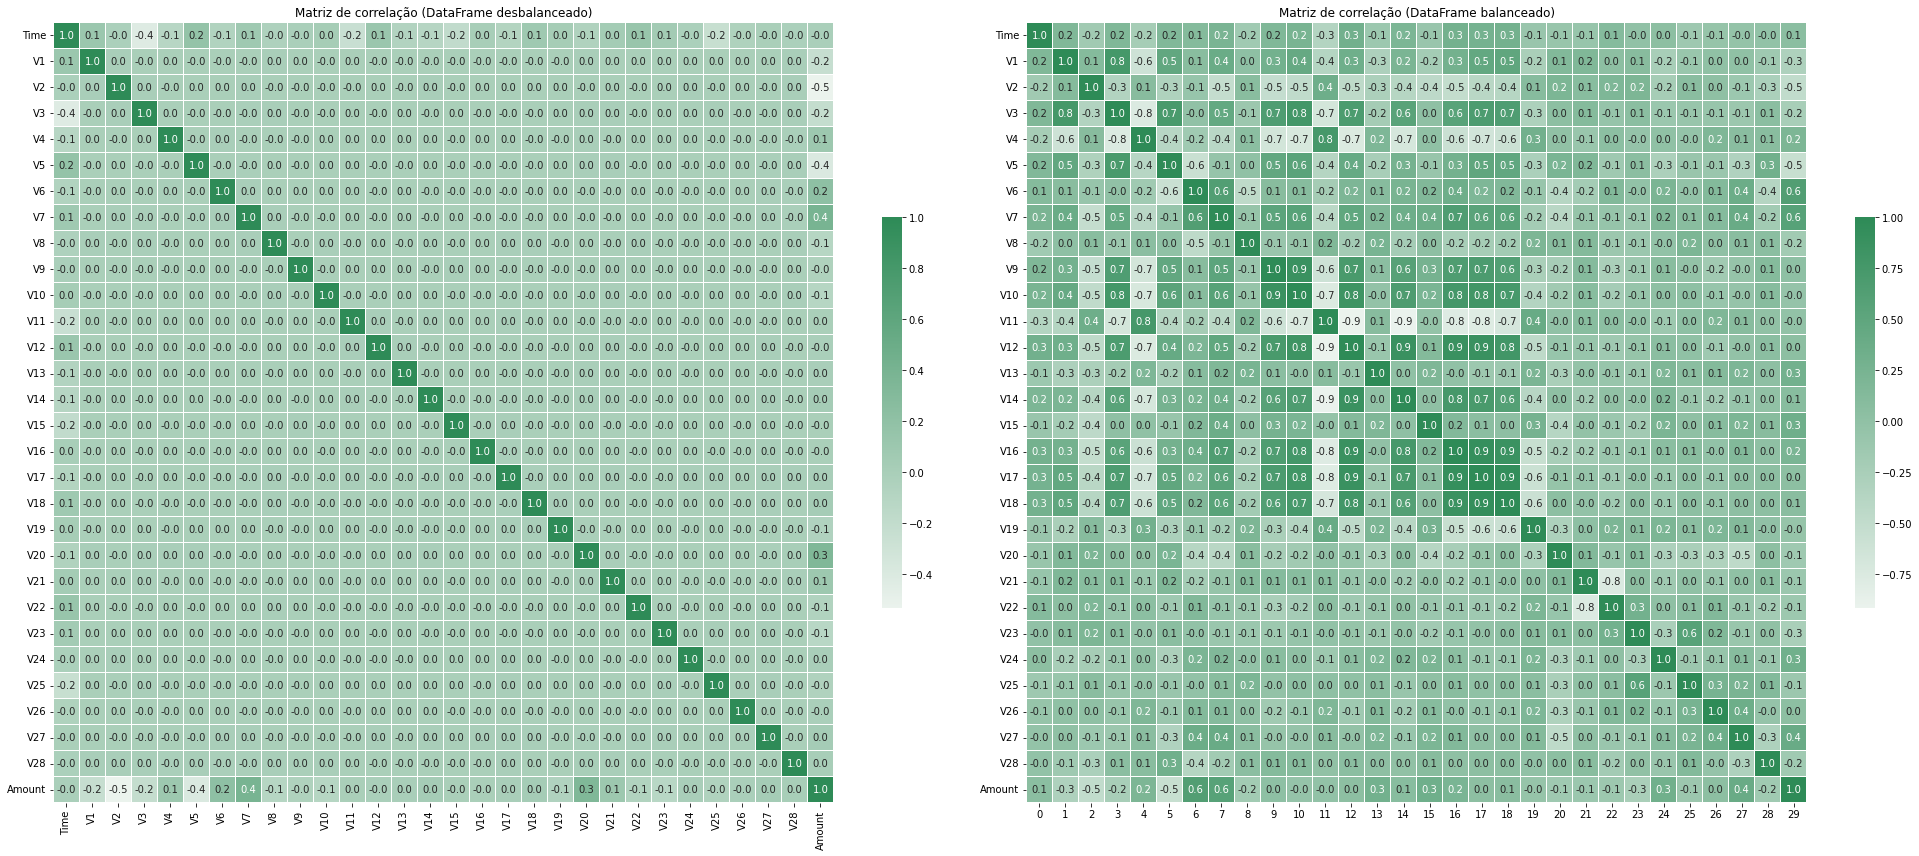

In [ ]:
import seaborn as sns

# calculando a matriz de correlação
corr_unbalanced = X_train.corr()
corr_balanced = pd.DataFrame(X_train_res).corr()

# instanciamento objeto Figure e Axes do Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(28, 12))

cmap = sns.light_palette("seagreen", as_cmap=True)

# plotando a matriz de correlação
sns.heatmap(corr_unbalanced, cmap=cmap, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f', ax=ax[0]);
sns.heatmap(corr_balanced, yticklabels=corr_unbalanced.columns, cmap=cmap, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f', ax=ax[1]);

ax[0].set_title('Matriz de correlação (DataFrame desbalanceado)');
ax[1].set_title('Matriz de correlação (DataFrame balanceado)');

plt.tight_layout()

plt.savefig("matriz_corr.jpeg", dpi=500, bbox_inches='tight')

No comparativo acima, facilmente podemos visualizar que a matriz de correlação utilizando o DataFrame balanceado é bem melhor distribuida, fazendo mais sentido e tranzendo mais informações sobre variáveis que se correlacionam se campararmos com a matriz de correlação com o DataFrame desbalanceado.

<div class="markdown-google-sans">

# <strong>Modeling
</div>



<div class="markdown-google-sans">

## Baseline com Regressão Logística
</div>



A modelagem preditiva de grandes volumes de dados de consumidores é amplamente utilizada na detecção de fraudes em vários setores, especialmente no bancário, em telecomunicações e no comércio online.

É preciso estimar a probabilidade real de algo ocorrer ou ser. Sendo assim, a Regressão Logística é um modelo projetado para estimativas precisas de probabilidade de classe.

<div class="markdown-google-sans">

### Treinando o modelo com o DataFrame balanceado
</div>

In [ ]:
from sklearn.linear_model import LogisticRegression

# criação do modelo
modelo_balanceado = LogisticRegression()

# treinando o modelo
modelo_balanceado.fit(X_train_res, Y_train_res);

print(X_train_res.shape, Y_train_res.shape)

(788, 30) (788,)


<div class="markdown-google-sans">

### Treinando o modelo com o DataFrame desbalanceado
</div>

In [ ]:
from sklearn.linear_model import LogisticRegression

# criação do modelo
modelo_desbalanceado = LogisticRegression()

# treinando o modelo
modelo_desbalanceado.fit(X_train_sc, Y_train);

print(X_train_sc.shape, Y_train.shape)

(227845, 30) (227845,)


<div class="markdown-google-sans">

# <strong>Evaluation</strong>
</div>



Para evitar confusão na interpretação dos valores  que serão obtidos pelas métricas de avaliação, é preciso explicar o que será avaliado em nosso modelo.

No dataset utilizado neste projeto, as transações rotuladas com zero (0) foram consideradas como transações legítimas (negativos) e as transações rotuladas com um (1) são consideradas fraudes (positivos).

<div class="markdown-google-sans">

## Avaliando o modelo_desbalanceado
</div>

<div class="markdown-google-sans">

### Acuracidade nos dados de treino
</div>


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# fazendo as predições da variável alvo sobre os dados de treino
Y_train_pred_des = modelo_desbalanceado.predict(X_train_sc)
Y_train_proba_des = modelo_desbalanceado.predict_proba(X_train_sc)

Y_train_pred_des_accuracy = accuracy_score(y_true=Y_train, y_pred=Y_train_pred_des)

print(f"Accurácia sobre os dados de treino: {Y_train_pred_des_accuracy}")

Accurácia sobre os dados de treino: 0.99923632293884


<div class="markdown-google-sans">

### Acuracidade nos dados de teste
</div>



In [ ]:
# fazendo as predições da variável alvo sobre os dados de treino
Y_test_pred_des = modelo_desbalanceado.predict(X_test_sc)
Y_test_proba_des = modelo_desbalanceado.predict_proba(X_test_sc)

Y_test_pred_des_accuracy = accuracy_score(y_true=Y_test, y_pred=Y_test_pred_des)

print(f"Accurácia sobre os dados de treino: {Y_test_pred_des_accuracy}")

Accurácia sobre os dados de treino: 0.9991748885221726


<div class="markdown-google-sans">

## Avaliando o modelo_balanceado
</div>

<div class="markdown-google-sans">

### Acuracidade nos dados de treino
</div>


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# fazendo as predições da variável alvo sobre os dados de treino
Y_train_pred_bal = modelo_balanceado.predict(X_train_sc)
Y_train_proba_bal = modelo_balanceado.predict_proba(X_train_sc)

Y_train_pred_bal_accuracy = accuracy_score(y_true=Y_train, y_pred=Y_train_pred_bal)

print(f"Accurácia sobre os dados de treino: {Y_train_pred_des_accuracy}")

Accurácia sobre os dados de treino: 0.99923632293884


<div class="markdown-google-sans">

### Acuracidade nos dados de teste
</div>



In [ ]:
# fazendo as predições da variável alvo sobre os dados de treino
Y_test_pred_bal = modelo_balanceado.predict(X_test_sc)
Y_test_proba_bal = modelo_balanceado.predict_proba(X_test_sc)

Y_test_pred_bal_accuracy = accuracy_score(y_true=Y_test, y_pred=Y_test_pred_bal)

print(f"Accurácia sobre os dados de treino: {Y_test_pred_bal_accuracy}")

Accurácia sobre os dados de treino: 0.9499315333029037


Embora a acuracidade do nosso modelo tanto nos dados de treino quanto nos dados de teste tenha sido excelentes, utilizar somente está métrica para este contexto não é suficiente para medir o desempenho do nosso modelo.

Nosso interesse aqui é avaliar os acertos do modelos nas transações que foram fraudes (Positivos).

<div class="markdown-google-sans">

### Curiosidade!
</div>

O método ```predict_proba()``` retorna uma matriz NxM onde *N* é a quantidade de observações do seu conjunto de teste e *M* é a quantidade de classes. Cada uma das posições em *M* possui a probabilidade de ser a classe.

Para visualizar melhor isso, abaixo transformei esta matriz em um DataFrame rotulando as colunas com suas respectivas classes.

In [ ]:
# tranformando a matriz retornada pelo método predict_proba() em um DataFrame rotulado
pd.DataFrame(modelo_balanceado.predict_proba(X_test_sc), columns=modelo_balanceado.classes_).head()

,0,1
0,0.969297,0.030703
1,0.990209,0.009791
2,0.999274,0.000726
3,0.977398,0.022602
4,0.081059,0.918941


<div class="markdown-google-sans">

## Matriz de confusão
</div>




A matriz de confusão separa as decisões tomadas pelo classificador, tornando explícito como uma classe está sendo confundida com a outra. Desta forma, diferentes tipos de erros podem ser tratados separadamente. Na matriz de confusão, a diagonal principal contém a contagem das decisões corretas.

Exemplificando o que realmente cada valor significa em nossa matriz:

**TP** = Exemplos positivos classificados como positivos (ACERTOS)

**TN** = Exemplos negativos classificados como negativos (ACERTOS)

**FP** = Exemplos negativos classificados como positivos (ERROS, também chamados de falsos alarmes)

**FN** = Exemplos positivos classificados como negativos (ERROS)

**Vamos assumir que:**

exemplos positivos = transações legítimas

exemplo negativos  = transações fraudulentas

<img src="https://drive.google.com/uc?export=view&id=1bO8JOH5TMbzdN67OzJ6NlQ43Fs1AmY-y" width="70%"></p>


Para avaliarmos a nossa matriz de confusão e avançarmos na analise dos resultados das métricas é preciso definir os impactos para cada uma das classificações do nosso modelo.

Caso nosso modelo classifique uma transação como legítima quando não é. Este é um erro falso negativo e pode ser caro e estressante para o titular do cartão e o banco, trazendo prejuízos para alguém.

Agora, se tivermos o caso oposto onde o modelo classifica uma transação como fraude quando não é. Este é um erro falso positivo. Esse erro, embora cause um certo estresse ao cliente e banco, não causaria prejuízos financeiros.

Diante deste cenário fica claro que estes erros devem ser contados separadamente e os erros **falsos negativos** (**FN**) tem um peso maior em relação aos outros.

<div class="markdown-google-sans">

### das predições do modelo_desbalanceado com dados de teste
</div>


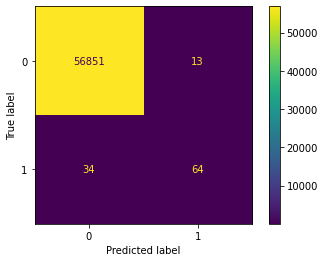

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

cm = confusion_matrix(y_true=Y_test, y_pred=Y_test_pred_des, labels=modelo_desbalanceado.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_desbalanceado.classes_)

display.plot();

<div class="markdown-google-sans">

### das predições do modelo_balanceado com dados de teste
</div>

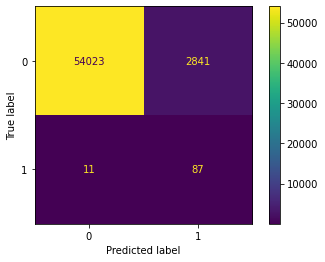

In [ ]:
cm = confusion_matrix(y_true=Y_test, y_pred=Y_test_pred_bal, labels=modelo_balanceado.classes_)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_balanceado.classes_)

display.plot();

Comparando as matrizes de confusão do modelo desbalanceado com o modelo balanceado percebe-se uma melhora significativa nas classificações entre os modelos.

Com o modelo treinado com os dados balanceados, houve um redução na quantidade de verdadeiros positivos (TP), um aumento de verdadeiros negativos (TN) e uma diminuição de falsos negativos (FN), ou seja, nosso modelo foi capaz de ser mais assertivo nas classificações, com uma diminuição na taxa de erros dos falsos negativos (FP), que é o quadrante (3) crítico na avaliação do nosso classificador.

<div class="markdown-google-sans">

### das predições do modelo_balanceado com dados de teste (normalizada)
</div>

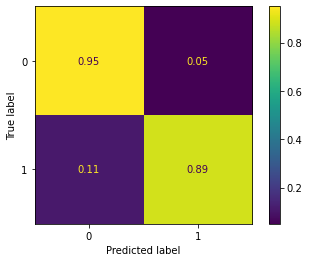

In [ ]:
cm = confusion_matrix(y_true=Y_test, y_pred=Y_test_pred_bal, labels=modelo_balanceado.classes_, normalize="true")

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_balanceado.classes_)

display.plot();

Na matriz de confusão normalizada podemos avaliar as classificações percentualmente.

Classificações que foram:

* Classificadas como legítimas e realmente são: 95%
* Classificadas como fraudes e realmente são: 89%
* Classificadas como legítimas e são fraudes: 11%
* Classificadas como fraudes e são legítimas: 5%

<div class="markdown-google-sans">

## Avaliando métricas Precision e Recall
</div>

<div class="markdown-google-sans">

### <strong>Precision</strong>
</div>

A métrica precision ou precisão indica a proporção de classificações corretas feitas pelo nosso modelo.

\begin{align}
\text {precisão} = \frac{\text{Número de decições corretas tomadas}}{\text{Número total de decisões tomadas}}
\end{align}

$$
\text {ou}
$$

$$
\text {precision}=\frac{TP}{TP+FP}
$$

O problema da precisão, como uma métrica, é que ela não faz distinção entre os erros falsos positivos e falsos negativos.

No relatório de classificação abaixo é possivel verificar os valores da precisão para cada uma das classes presentes no nosso DataFrame.

Para a classe 0 (transações legítimas) obtivemos uma precisão de 99%, isso significa que temos uma alta taxa de transações que foram classificadas como legítimas e que realmente são legítimas (TN) e uma baixa taxa de fraudes classificadas como legítimas (FN).

Para a classe 1 (transações fraudulentas) obtivemos uma precisão de aproximadamente 3%, isso significa que temos uma alta taxa de transações que foram classificadas como fraudes e na verdade são legítimas (FP).

Vale lembrar que a precisão na classe 1 é de aproximadamente 3% devido a quantidade reduzida da classe 1 no DataFrame de testes, ou seja, tem-se uma proporção muito maior da classe 0.


In [ ]:
 # proporção das classes no DataFrame de testes
Y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

<div class="markdown-google-sans">

### <strong>Recall</strong>
</div>

Recall é a proporção da instâncias da classe positiva ou negativa que foram classificadas como positivas ou negativas respectivamente.

Nesta métrica os falsos negativos ou falsos positivos são levados em consideração para avaliar a proporcionalidade das instâncias.

$$
\text {Recall} = \frac{TP}{TP+FN}
$$

Com esta métrica alcançou-se os seguintes resultados:

* Para a classe 0 (transações legítimas) obteve-se um recall de 95%, isto significa que nosso modelo classificou corretamente 95% das instâncias rotuladas como transações legítimas (classe 0);
* Para a classe 1 (transações fraudulentas) obteve-se um recall de 88%, isto significa que nosso modelo classificou corretamente 88% das instâncias rotuladas como transações fraudulentas (classe 1).



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=Y_test, y_pred=Y_test_pred_bal, labels=[0, 1], digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9500    0.9743     56864
           1     0.0297    0.8878    0.0575        98

    accuracy                         0.9499     56962
   macro avg     0.5148    0.9189    0.5159     56962
weighted avg     0.9981    0.9499    0.9727     56962



Quanto as métricas **Precision** e **Recall** é importante notar que quando estamos avaliando a Precision de um modelo, analisamos o modelo do ponto de vista das predições e, quando estamos avaliando o Recall de um modelo, analisamos do ponto de vista das classes verdadeiras. 


<div class="markdown-google-sans">

## Avaliando curva ROC e AUC

### <strong>ROC - *Receiver Operating Characteristic*</strong>
</div>

Um gráfico ROC é uma representação bi-dimensional de um classificador com uma **taxa de falso positivo** no eixo *x* contra uma **taxa de verdadeiro positivo** sobre o eixo *y*.

<img src="https://drive.google.com/uc?export=view&id=1qKdIfLWYYRzQu58QlK_JQtRQwTZ76ZwR" width="60%"></p>



<div class="markdown-google-sans">

### <strong>AUC - *Area under the ROC curve*</strong>
</div>

A AUC é util quando um único número é necessário para resumir o desempenho do modelo. Seu valor varia de zero a um.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# pegando somente as probabilidades da classe 1
lr_fraud_probs = Y_test_proba_bal[:,1]

# calculando a AUC
lr_auc = roc_auc_score(Y_test, lr_fraud_probs)

print('Regressão logística: AUROC = %.3f' % (lr_auc))

Regressão logística: AUROC = 0.964


De acordo com Forest Provost e Tom Fawcett, a AUC é uma boa estatística de resumo geral da previsão de um classificador. Ela varia de zero a um. Um valor de 0.5 corresponde à aleatoriedade (o classificador não consegue distinguir entre positivos e negativos) e um valor de um significa que ele é perfeito para distingui-lo.

Neste caso obtivemos um AUC muito próximo a um, ou seja, nosso classificador está próximo da perfeição para distinguir as nossas classes.

In [ ]:
# obtendo os valores de FPR e TPR
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_fraud_probs)

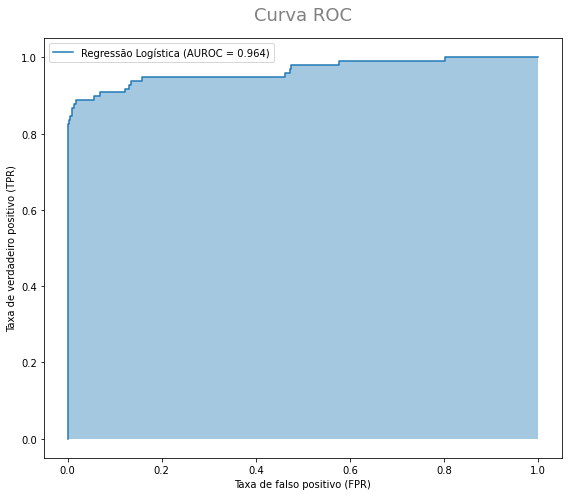

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))

ax.plot(lr_fpr, lr_tpr, label='Regressão Logística (AUROC = %0.3f)' % lr_auc)
ax.fill_between(lr_fpr, lr_tpr, alpha=0.4)

ax.set_title('Curva ROC', fontsize=18, pad=18, color="grey")
ax.set_xlabel('Taxa de falso positivo (FPR)')
ax.set_ylabel('Taxa de verdadeiro positivo (TPR)')
ax.legend() 

plt.tight_layout()

plt.savefig("roc_curve.jpeg", dpi=500, bbox_inches='tight')

<div class="markdown-google-sans">

## Testando com outros algoritmos
</div>

Nesta etapa são treinados modelos de classificação da Árvore de Decisão, Floresta Aleatória e K-Vizinhos mais próximos. Em seguida os modelos são avaliados.

In [ ]:
# importação dos algoritmos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# método auxiliar que retorna os modelos
def choose_model(alg: str):
  modelo = None
  if alg == "decision_tree":
    model = DecisionTreeClassifier()
  elif alg == "random_forest": 
    model = RandomForestClassifier()
  elif alg == "knn":
    model = KNeighborsClassifier()
  return model

# laço de repetição para cada algoritmo
for alg in ["decision_tree", "random_forest", "knn"]:

  # instancia o modelo para o respectivo algoritmo
  model = choose_model(alg)

  # treinamento do modelo
  model.fit(X_train_sc, Y_train)

  # fazendo as predições utilizando os dados de treino
  Y_pred_train = model.predict(X_train_sc)
  Y_proba_train = model.predict_proba(X_train_sc)[:,1]

  # avaliando o modelo utilizando os dados de treino
  accuracy = accuracy_score(Y_train, Y_pred_train)
  precision, recall, fscore, _ = precision_recall_fscore_support(Y_train, Y_pred_train, average="binary")
  auc_train = roc_auc_score(Y_train, Y_proba_train)

  # fazendo as predições utilizando os dados de treino
  Y_pred_test = model.predict(X_test_sc)
  Y_proba_test = model.predict_proba(X_test_sc)[:,1]

  # avaliando o modelo utilizando os dados de treino
  accuracy = accuracy_score(Y_test, Y_pred_test)
  precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, Y_pred_test, average="binary")
  auc_test = roc_auc_score(Y_test, Y_proba_test)

  print('-' * 50)
  print(alg)
  print('-' * 50)
  print('Train - Accuracy:', accuracy)
  print('Train - Precision:', precision)
  print('Train - Recall:', recall)
  print('Train - Fscore:', fscore)
  print('Train - AUC:', auc_train)
  print('-' * 50)
  print('Test - Accuracy:', accuracy)
  print('Test - Precision:', precision)
  print('Test - Recall:', recall)
  print('Test - Fscore:', fscore)
  print('Test - AUC:', auc_test)
  print()

--------------------------------------------------
decision_tree
--------------------------------------------------
Train - Accuracy: 0.9990695551420246
Train - Precision: 0.7272727272727273
Train - Recall: 0.7346938775510204
Train - Fscore: 0.730964467005076
Train - AUC: 1.0
--------------------------------------------------
Test - Accuracy: 0.9990695551420246
Test - Precision: 0.7272727272727273
Test - Recall: 0.7346938775510204
Test - Fscore: 0.730964467005076
Test - AUC: 0.867109530221768

--------------------------------------------------
random_forest
--------------------------------------------------
Train - Accuracy: 0.9996488887328394
Train - Precision: 0.9534883720930233
Train - Recall: 0.8367346938775511
Train - Fscore: 0.8913043478260869
Train - AUC: 1.0
--------------------------------------------------
Test - Accuracy: 0.9996488887328394
Test - Precision: 0.9534883720930233
Test - Recall: 0.8367346938775511
Test - Fscore: 0.8913043478260869
Test - AUC: 0.9528325011771732


<div class="markdown-google-sans">

## Conclusões
</div>

Este projeto apresentou a utilização de aprendizagem de máquina para resolver um problema muito comum nos dias atuais que é a detecção de fraude em cartão de crédito. Este tema trás consigo alguns desafios que devem ser enfrentados para se ter uma melhor assertividade nas previsões das classes das transações, a principal delas é um dataset com classes desbalanceadas, onde nossa classe indicando transações fraudulentas estava abaixo de 1% do total de transações em nosso dataset.

Diante deste problema, utilizou-se a técnica de under-sampling para equalizar a classe majoritária as quantidades de registros da classe minoritária, esta técnica provou-se conveniente, trazendo melhoras no resultado das previsões das classes utilizando o modelo treinado com o dataset balanceado.

Além disso, vimos que utilizar somente uma métrica para avaliar um modelo não é o suficiente. Nosso objetivo neste projeto foi melhorar ao máximo as previsões das classes fraudulentas que realmente foram fraudes e diminuir as previsões fraudulentas mas que na verdade eram transações legítimas, as métricas Precision e Recall nos ajudaram nesta avaliação.
Por fim, foram feitos testes treinando diferentes modelos de Machine Learning para comparar o nosso modelo (Regressão Logística) com outros algoritmos.


<div class="markdown-google-sans">

## Referências
</div>

* AZEVEDO, Frederico Luis de. **Detecção de Fraudes de Cartão de Crédito em uma Base Brasileira utilizando Autoencoder**. 2021. Dissertação (Pós-Gradução em Computação) - Instituto Federal do Espírito Santo, Serra, 2021. Disponível em https://repositorio.ifes.edu.br/bitstream/handle/123456789/1744/dissertacao-frederico-luis-de-azevedo.pdf?sequence=1&isAllowed=y. Acesso em 12 nov. 2022.

* SHAKYA, Ronish. Application of machine learning techniques in credit card
fraud detection. [S.l.: s.n.], 2018.

* KNIEFF, Ben. **Global consumer card fraud: where card fraud is coming from**. [S.l.:s.n.], 2016.

* BANCO CENTRAL DO BRASIL. **Estatísticas de Pagamentos de Varejo e de
Cartões no Brasil**. 2021. Disponível em: https://www.bcb.gov.br/estatisticas/spbadendos. Acesso em: 12 dez. 2022.

* CHAN, Philip K et al. **Distributed data mining in credit card fraud detection. IEEE Intelligent systems**, n. 6, p. 67–74, 1999.

* FIORE, Ugo et al. **Using generative adversarial networks for improving classification effectiveness in credit card fraud detection**. Information Sciences, Elsevier, 2017


* MARTINS, Emerson et al. **Detecção de fraudes no segmento de crédito financeiro utilizando aprendizado de máquina: uma revisão da literatura**. E-TECH, Florianópolis, ano 2022, v. 15, n. 3, p. 1-17, [s.d.]. DOI https://doi.org/10.18624/etech.v15i3.1198. Disponível em: https://etech.emnuvens.com.br/revista-cientifica/article/view/1198/139. Acesso em: 12 nov. 2022.

* PYMNTS. **Credit, Debit Card Fraud Losses Reached $21.84 Billion Last Year**. PYMNTS, Boston, USA, 26 Oct. 2016. Disponível em: https://www.pymnts.com/news/security-an-d-risk/2016/credit-and-debit-card-fraud-rea-ches-21-84-billion/. Acesso em: 12 nov. 2022.
* EKELUND, Suzanne. **ROC curves – what are they and how are they used?**. [S. l.], Jan. 2011. Disponível em: https://acutecaretesting.org/en/articles/roc-curves-what-are-they-and-how-are-they-used. Acesso em: 29 nov. 2022.

* PROVOST, Foster; FAWCETT, Tom. **Data Science para Negócios**: O que você Precisa Saber Sobre Mineração e Pensamento Analítico de Dados. 1. ed. Rio de Janeiro: Alta Books, 2016. 408 p. v. 1. ISBN 978-85-7608-972-8.

* Yan-Ping Zhang, Li-Na Zhang, and Yong-Cheng Wang. **Cluster-based majority
under-sampling approaches for class imbalance learning**. In 2010 2nd
IEEE International Conference on Information and Financial Engineering, pages 400–404. IEEE, 2010.

Bibliotecas

* [Seaborn - Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [Seaborn - Correlations](https://seaborn.pydata.org/examples/many_pairwise_correlations.html?highlight=styles+cmap)
* [Cluster Centroids](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html)


<p align='center'>
  <u>Links</u><br>
<p align='center'>  
<a href="https://github.com/lstarke"><img height="30" src="https://drive.google.com/uc?export=view&id=1zm3i30Nw_hv3o9OZlJ_Zn4eZzT2UYm3j"></a>&nbsp;&nbsp;
<a href="https://www.instagram.com/leandrostarke/"><img height="30" src="https://drive.google.com/uc?export=view&id=1ydNOHlx9LYJUaqBvjcmtwmIFK08ifJHe"></a>&nbsp;&nbsp;
<a href="https://www.linkedin.com/in/leandrostarke"><img height="30" src="https://drive.google.com/uc?export=view&id=1rLE2mhqNcjbfhfKVSlE4tuUEApHvc3uV"></a>&nbsp;&nbsp;
<a href="https://medium.com/@leandro.starke"><img height="30" src="https://drive.google.com/uc?export=view&id=1mscMrvKnT0PO1qxEgDEWcDtILqiPusbN"></a>&nbsp;&nbsp;
</p>